# Supplementary code for  *Integral equation methods for acoustic scattering by fractals*

This notebook contains sample code which can be used to reproduce the field plots in Section 5(a) of the Proc. R. Soc. paper **Integral equation methods for acoustic scattering by fractals**, by *A. M. Caetano, S. N. Chandler-Wilde, X. Claeys, A. Gibbs, D. P. Hewett and A. Moiola*.

All results in the above paper were produced using the open-source Julia package [IFSintegrals](https://github.com/AndrewGibbs/IFSintegrals). A technical understanding of this package is **not** required to understand the key ideas in this notebook. Throughout this notebook, we will make frequent references to equation numbers of the associated paper.

### Setting up the problem
First, we load the relevant Julia packages.

In [1]:
using IFSintegrals, Plots, LinearAlgebra;
import IFSintegrals: rotation2

Next, define the scatterer. Most of the examples considered are available as presets in ```IFSintegrals```. The variable ```eg_index``` determines which example to run. 

In [2]:
eg_index = 1;

The following values of ```eg_index``` correspond to different scattering configurations, each in $\mathbb{R}^2$:
1. The Koch curve (see Example 2.3)
2. Cantor set  with contraction factor $\rho=1/3$
3. Cantor dust with contraction factor $\rho=1/3$
4. A Koch snowflake, constructed as the union of three Koch curves (see Fig. 8(b))
5. The union of a Cantor set with contraction factor $\rho=1/3$ and a Koch curve.

Now we define our scatterer $\Gamma$ and plot it.

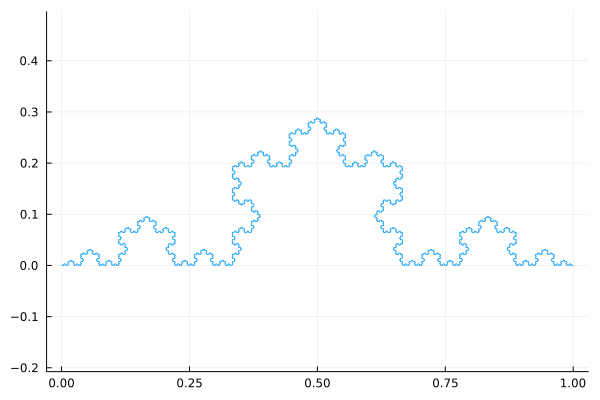

In [3]:
if eg_index == 1 # Koch curve
    Œì = KochCurve()
elseif eg_index == 2 # Cantor dust
    Œì = CantorSet() + [0,0]
elseif eg_index == 3 # Cantor set
    Œì = CantorDust()
elseif eg_index == 4 # Koch snowflake, as a union of Koch curves
    Koch_height = 0.288675134594813
    Œ≥ = KochCurve()+[-1/2,Koch_height]
    Œ≥‚ÇÅ = Œ≥
    Œ≥‚ÇÇ = rotation2(2œÄ/3)*Œ≥
    Œ≥‚ÇÉ = rotation2(4œÄ/3)*Œ≥
    Œì = UnionInvariantMeasure([Œ≥‚ÇÅ,Œ≥‚ÇÇ,Œ≥‚ÇÉ])
elseif eg_index == 5 # Cantor set union Koch curve
    Œ≥‚ÇÅ = CantorSet() + [0,-0.2] # embed Cantor set in ‚Ñù¬≤ and translate
    Œ≥‚ÇÇ = KochCurve()
    Œì = UnionInvariantMeasure([Œ≥‚ÇÅ, Œ≥‚ÇÇ])
end

# now plot the fractal
plot(Œì, aspect_ratio=1, legend=false, markersize=0.5)

We note that for cases ```eg_index```$=4,5$, we are translating the fractals by adding a vector, and ```eg_index```$=4$ also has a rotation. By default, the Cantor set is defined as a subset of $\mathbb{R}$. By adding $[0,0]$ in line 4 (similarly in line 15), the Cantor set is embedded in $\mathbb{R}^2$.

Now we define an incident plane wave $u^i(x):=\mathrm{e}^{\mathrm{i}k\vartheta\cdot x}$:

In [4]:
k = 20.0 # wavenumber
œë = [1, 1]/sqrt(2) # incident direction
u‚Å±(x) = exp(im*k*(œë‚ãÖx)) 
g(x) = -u‚Å±(x)

g (generic function with 1 method)

In the final line above, we construct the right-hand side data (3.6).

### Approximating the solution

Now define the approximation parameters $h$ and $h_Q$. Choosing smaller values will make the solution more accurate, but will make the coder take longer.

In [5]:
h = 0.05 # max mesh width of BEM elements
hQ = 0.01; # max mesh width for quadrature in BEM

Define the boundary integral operator $A$ of (3.15), and its discretised stucture $A_h$, which contains essential information about the mesh, Galerkin matrix (4.16), etc. Then solve the system to obtain the discrete solution $\phi_h$.

In [6]:
A = SingleLayerOperatorHelmholtz(Œì, k) # Single layer operator defined on screen Œì, with wavenumber k
A‚Çï = DiscreteSIO(A; h_mesh = h, h_quad = hQ)
œï_N = A‚Çï\g;

The final line above represents the Galerkin system (4.15). Now we can construct an approximation to the total field using (3.14) and (3.10):

In [7]:
ùòàœï_N = SingleLayerPotentialHelmholtz(œï_N,k; h_quad = hQ)# returns function
u_N(x) = u‚Å±(x) + ùòàœï_N(x) # total field

u_N (generic function with 1 method)

### Plotting the total field

Now we create a box in which we will plot our solution. The variable ```Npixels``` determines the resolution, if this is increased then the code will take longer.

In [8]:
Npixels = 150;
box_xlims = [-1,2] # horizontal limits of box
box_ylims = [-1,1]; # vertical limits of box

In [9]:
h‚ñ°x = (box_xlims[2]-box_xlims[1])/Npixels
h‚ñ°y = (box_ylims[2]-box_ylims[1])/Npixels
x‚ÇÅ = box_xlims[1]:h‚ñ°x:box_xlims[2]
x‚ÇÇ = box_ylims[1]:h‚ñ°y:box_ylims[2]
X = [[x‚ÇÅ_,x‚ÇÇ_] for x‚ÇÅ_‚ààx‚ÇÅ, x‚ÇÇ_‚ààx‚ÇÇ];

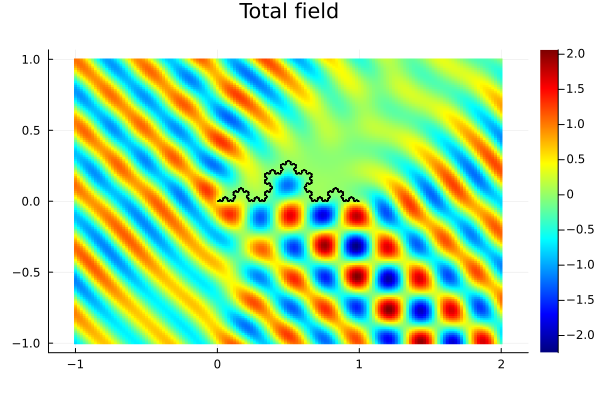

In [10]:
heatmap(x‚ÇÅ,x‚ÇÇ,transpose(real(u_N.(X))), aspect_ratio = 1, 
    title="Total field", label=false, c = :jet)
plot!(Œì,color = "black", markersize=0.5, label=false)